In [2]:
from tensorflow.keras import Sequential, models, layers, datasets
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL

In [5]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [6]:
X_train_scaled = X_train/255.0

X_test_scaled = X_test/255.0

In [7]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
for layer in convolutional_base.layers:
        layer.trainable=False
convolutional_base.summary()

94765736/94765736 [==============================] - 5s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                      

In [8]:
new_model = models.Sequential()
new_model.add(layers.UpSampling2D((2,2)))
new_model.add(layers.UpSampling2D((2,2)))
new_model.add(layers.UpSampling2D((2,2)))
new_model.add(convolutional_base)
new_model.add(Flatten())
new_model.add(Dense(512, activation='relu'))
new_model.add(Dense(10, activation='softmax'))

In [9]:
new_model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
epochs=10
history = new_model.fit(
  X_train_scaled,
  y_train,
  validation_split = 0.1,
  epochs=epochs
)

Epoch 1/10
1563/1563 [==============================] - 264s 164ms/step - loss: 0.8350 - accuracy: 0.7326
Epoch 2/10
1563/1563 [==============================] - 255s 163ms/step - loss: 0.3686 - accuracy: 0.8774
Epoch 3/10
1563/1563 [==============================] - 255s 163ms/step - loss: 0.1707 - accuracy: 0.9413
Epoch 4/10
1563/1563 [==============================] - 255s 163ms/step - loss: 0.0854 - accuracy: 0.9710
Epoch 5/10
1563/1563 [==============================] - 256s 164ms/step - loss: 0.0440 - accuracy: 0.9854
Epoch 6/10
1563/1563 [==============================] - 256s 164ms/step - loss: 0.0256 - accuracy: 0.9920
Epoch 7/10
1563/1563 [==============================] - 256s 164ms/step - loss: 0.0147 - accuracy: 0.9954
Epoch 8/10
1563/1563 [==============================] - 254s 163ms/step - loss: 0.0095 - accuracy: 0.9972
Epoch 9/10
1563/1563 [==============================] - 254s 163ms/step - loss: 0.0073 - accuracy: 0.9978
Epoch 10/10
1563/1563 [=======================

Calculate accuracy on test data

In [ ]:
loss, accuracy = new_model.evaluate(X_test_scaled, y_test)
print('Test Accuracy =', accuracy)

313/313 [==============================] - 48s 151ms/step - loss: 5.5551 - accuracy: 0.1001
Test Accuracy = 0.10010000318288803


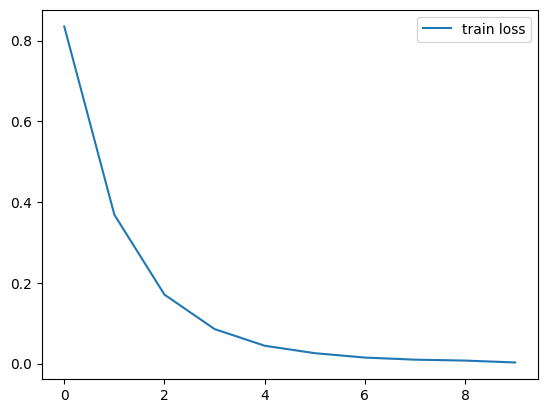

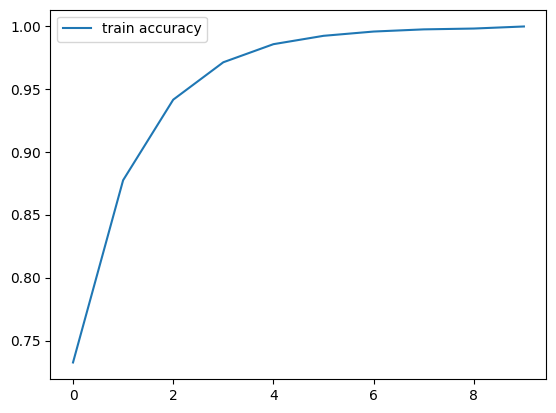

In [11]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

In [12]:
!mkdir -p saved_model
new_model.save('saved_model/my_model')